In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeClassifier, Lasso
from sklearn.naive_bayes import GaussianNB
import warnings
warnings.filterwarnings("ignore")   


In [58]:
df=pd.read_csv("Parkinsson disease.csv")
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [59]:
df.shape

(195, 24)

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [61]:
print(df.drop('name', axis=1).skew())

MDVP:Fo(Hz)         0.591737
MDVP:Fhi(Hz)        2.542146
MDVP:Flo(Hz)        1.217350
MDVP:Jitter(%)      3.084946
MDVP:Jitter(Abs)    2.649071
MDVP:RAP            3.360708
MDVP:PPQ            3.073892
Jitter:DDP          3.362058
MDVP:Shimmer        1.666480
MDVP:Shimmer(dB)    1.999389
Shimmer:APQ3        1.580576
Shimmer:APQ5        1.798697
MDVP:APQ            2.618047
Shimmer:DDA         1.580618
NHR                 4.220709
HNR                -0.514317
status             -1.187727
RPDE               -0.143402
DFA                -0.033214
spread1             0.432139
spread2             0.144430
D2                  0.430384
PPE                 0.797491
dtype: float64


status
1    147
0     48
Name: count, dtype: int64


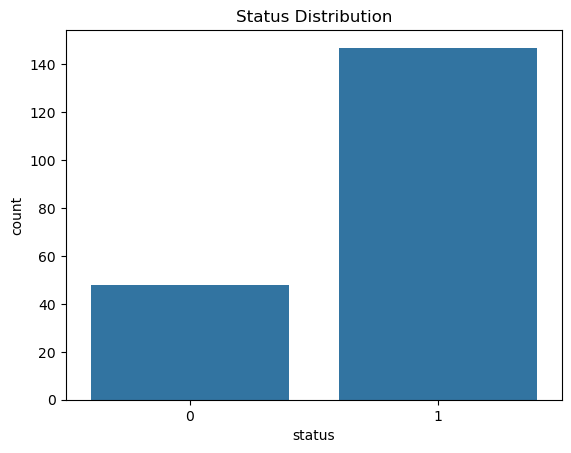

In [62]:
print(df['status'].value_counts())
sns.countplot(x='status', data=df)
plt.title('Status Distribution')
plt.show()

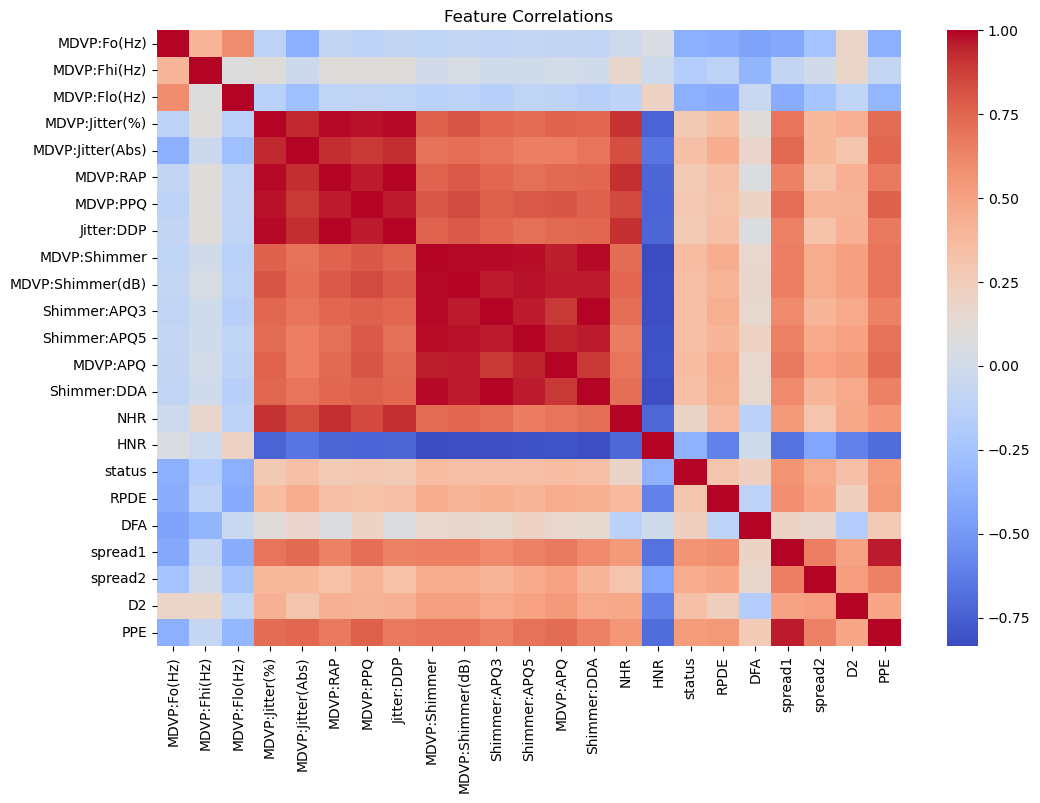

In [63]:
plt.figure(figsize=(12,8))
sns.heatmap(df.drop('name', axis=1).corr(), cmap='coolwarm')
plt.title('Feature Correlations')
plt.show()

In [64]:
df = df.drop('name', axis=1)

In [65]:
scaler = StandardScaler()
X = df.drop('status', axis=1)
y = df['status']
X_scaled = scaler.fit_transform(X)


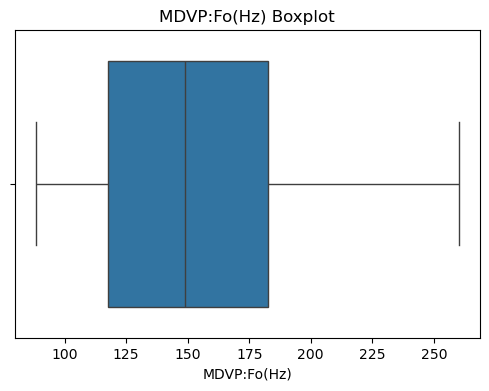

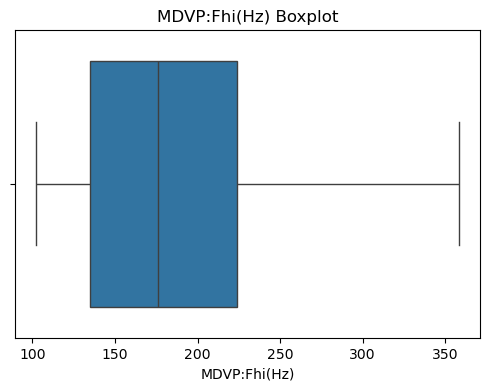

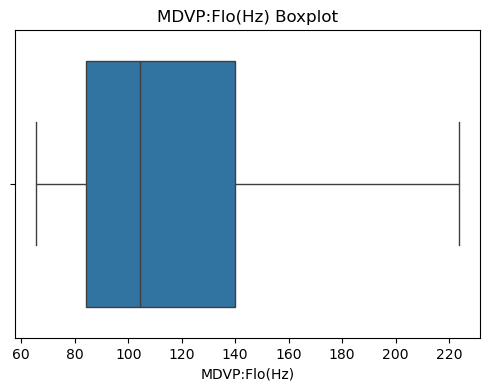

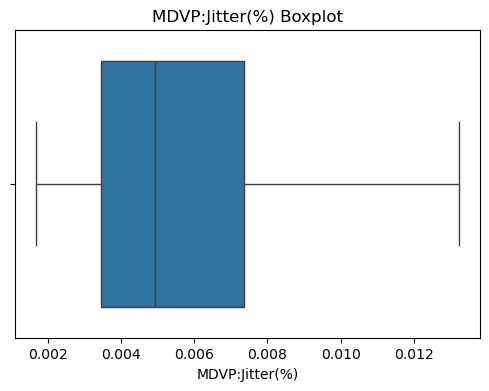

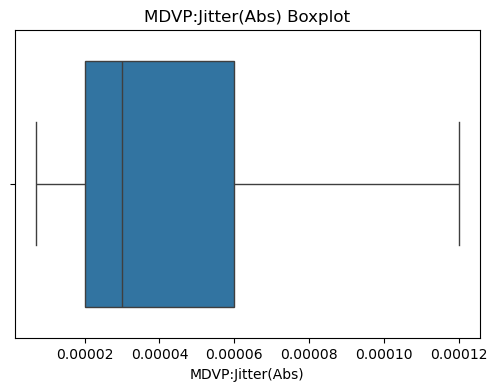

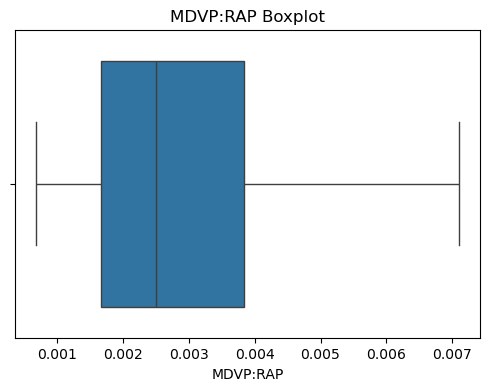

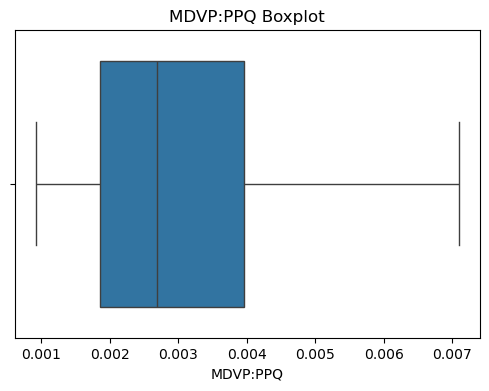

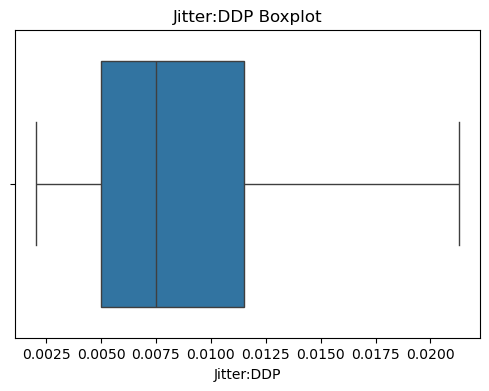

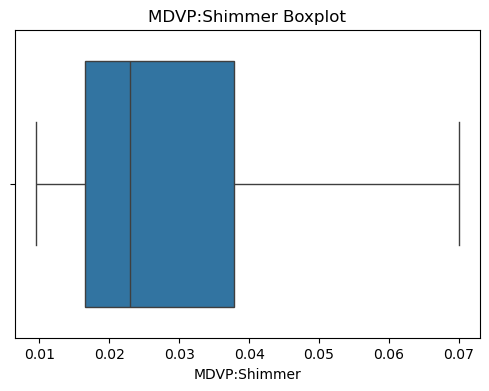

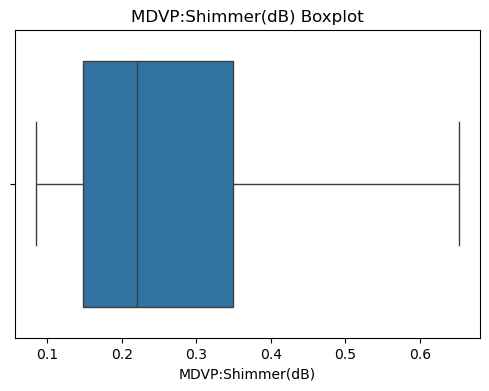

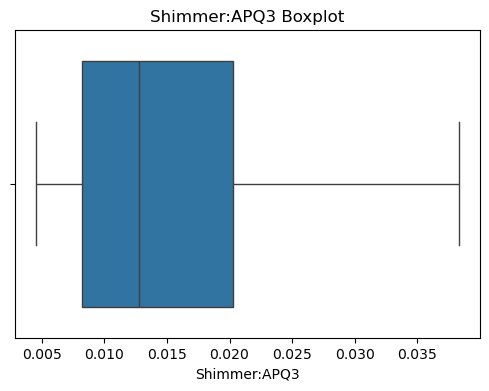

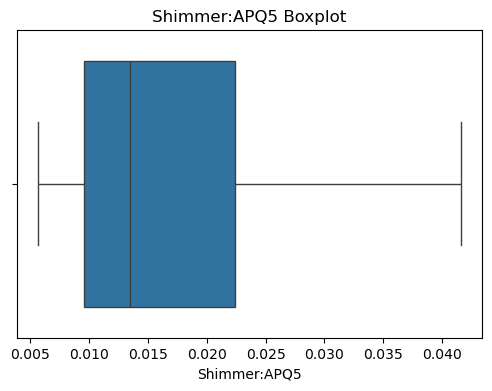

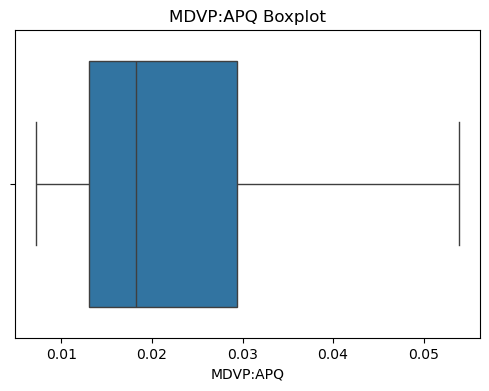

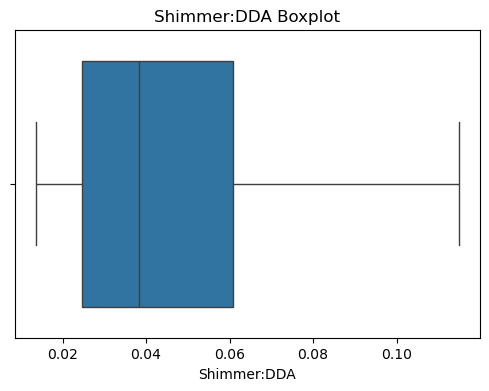

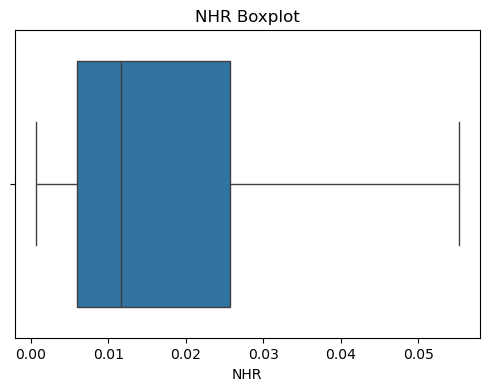

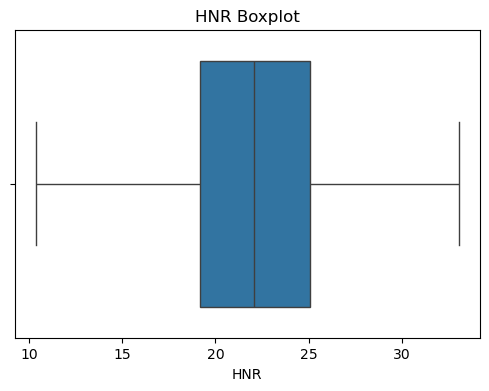

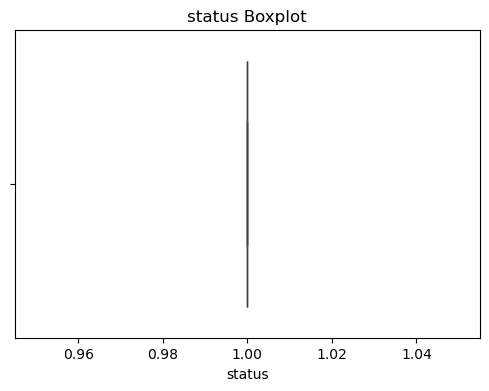

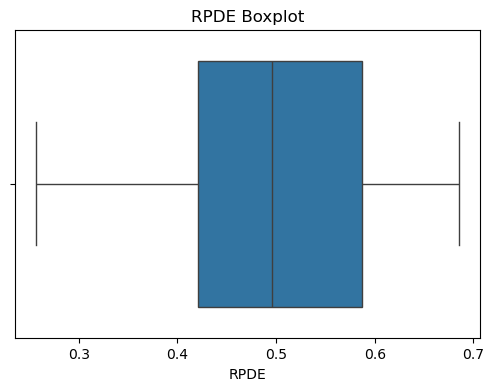

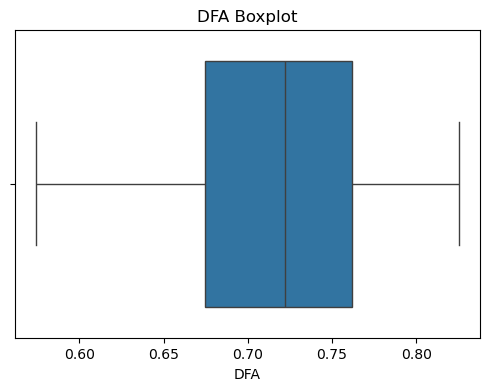

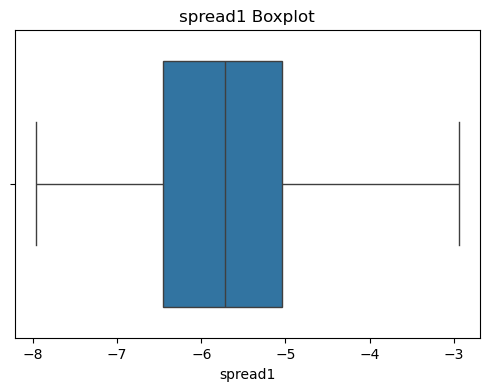

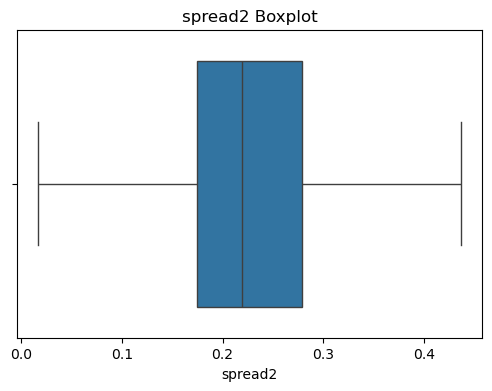

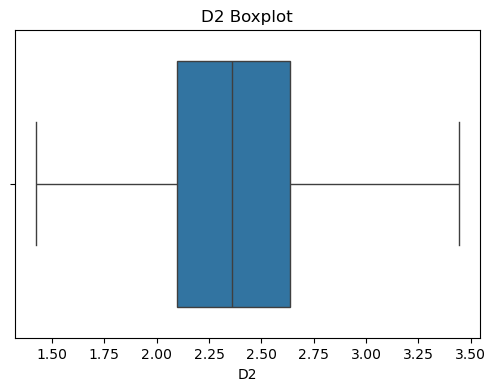

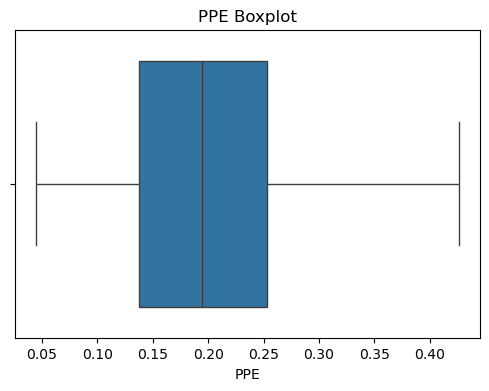

In [66]:
numeric_cols = df.select_dtypes(include=['number']).columns
for col in numeric_cols:
    q1, q3 = df[col].quantile([0.25, 0.75])
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    df[col] = df[col].clip(lower, upper)
for col in numeric_cols:

    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col])
    plt.title(f"{col} Boxplot")
    plt.show()

In [67]:
pt = PowerTransformer(method='yeo-johnson')
df[numeric_cols] = pt.fit_transform(df[numeric_cols])

print(df[numeric_cols].skew())

MDVP:Fo(Hz)         0.042970
MDVP:Fhi(Hz)        0.053626
MDVP:Flo(Hz)        0.104107
MDVP:Jitter(%)      0.169402
MDVP:Jitter(Abs)    0.150923
MDVP:RAP            0.202530
MDVP:PPQ            0.194930
Jitter:DDP          0.201026
MDVP:Shimmer        0.259556
MDVP:Shimmer(dB)    0.211562
Shimmer:APQ3        0.237984
Shimmer:APQ5        0.284760
MDVP:APQ            0.265071
Shimmer:DDA         0.230531
NHR                 0.349660
HNR                -0.003931
status              0.000000
RPDE               -0.044030
DFA                -0.010337
spread1             0.055747
spread2            -0.000797
D2                  0.000564
PPE                 0.045557
dtype: float64


In [68]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [69]:
logi = LogisticRegression()
logi.fit(X_train, y_train)
y_pred_logi = logi.predict(X_test)
print('Logistic Regression Accuracy:', accuracy_score(y_test, y_pred_logi))

Logistic Regression Accuracy: 0.8974358974358975


In [70]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print('Decision Tree Accuracy:', accuracy_score(y_test, y_pred_dt))

Decision Tree Accuracy: 0.8974358974358975


In [71]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print('Random Forest Accuracy:', accuracy_score(y_test, y_pred_rf))

Random Forest Accuracy: 0.9487179487179487


In [72]:
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
print('Naïve Bayes Accuracy:', accuracy_score(y_test, y_pred_nb))

Naïve Bayes Accuracy: 0.717948717948718


In [73]:
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)
print('Gradient Boosting Accuracy:', accuracy_score(y_test, y_pred_gb))

Gradient Boosting Accuracy: 0.9487179487179487


In [74]:
ada = AdaBoostClassifier()
ada.fit(X_train, y_train)
y_pred_ada = ada.predict(X_test)
print('AdaBoost Accuracy:', accuracy_score(y_test, y_pred_ada))

AdaBoost Accuracy: 0.8461538461538461


In [75]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
print('XGBoost Accuracy:', accuracy_score(y_test, y_pred_xgb))

XGBoost Accuracy: 0.9487179487179487


In [76]:
svm = SVC(probability=True)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
print('SVM Accuracy:', accuracy_score(y_test, y_pred_svm))

SVM Accuracy: 0.8974358974358975


In [77]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print('KNN Accuracy:', accuracy_score(y_test, y_pred_knn))

KNN Accuracy: 0.9487179487179487


In [78]:
print('Logistic Regression Report:\n', classification_report(y_test, y_pred_logi))
print('Naïve Bayes Report:\n', classification_report(y_test, y_pred_nb))
print('XGBoost Report:\n', classification_report(y_test, y_pred_xgb))
print('SVM Report:\n', classification_report(y_test, y_pred_svm))
print('Random Forest Report:\n', classification_report(y_test, y_pred_rf))
print('Decision Tree Report:\n', classification_report(y_test, y_pred_dt))
print('KNN Report:\n', classification_report(y_test, y_pred_knn))
print('Gradient Boosting Report:\n', classification_report(y_test, y_pred_gb))
print('AdaBoost Report:\n', classification_report(y_test, y_pred_ada))

Logistic Regression Report:
               precision    recall  f1-score   support

           0       1.00      0.43      0.60         7
           1       0.89      1.00      0.94        32

    accuracy                           0.90        39
   macro avg       0.94      0.71      0.77        39
weighted avg       0.91      0.90      0.88        39

Naïve Bayes Report:
               precision    recall  f1-score   support

           0       0.33      0.57      0.42         7
           1       0.89      0.75      0.81        32

    accuracy                           0.72        39
   macro avg       0.61      0.66      0.62        39
weighted avg       0.79      0.72      0.74        39

XGBoost Report:
               precision    recall  f1-score   support

           0       1.00      0.71      0.83         7
           1       0.94      1.00      0.97        32

    accuracy                           0.95        39
   macro avg       0.97      0.86      0.90        39
weighte

In [79]:
print('Logistic Regression Accuracy:', accuracy_score(y_test, y_pred_logi))
print('Decision Tree Accuracy:', accuracy_score(y_test, y_pred_dt))
print('Random Forest Accuracy:', accuracy_score(y_test, y_pred_rf))
print('Naïve Bayes Accuracy:', accuracy_score(y_test, y_pred_nb))
print('Gradient Boosting Accuracy:', accuracy_score(y_test, y_pred_gb))
print('AdaBoost Accuracy:', accuracy_score(y_test, y_pred_ada))
print('XGBoost Accuracy:', accuracy_score(y_test, y_pred_xgb))
print('SVM Accuracy:', accuracy_score(y_test, y_pred_svm))  
print('KNN Accuracy:', accuracy_score(y_test, y_pred_knn))

Logistic Regression Accuracy: 0.8974358974358975
Decision Tree Accuracy: 0.8974358974358975
Random Forest Accuracy: 0.9487179487179487
Naïve Bayes Accuracy: 0.717948717948718
Gradient Boosting Accuracy: 0.9487179487179487
AdaBoost Accuracy: 0.8461538461538461
XGBoost Accuracy: 0.9487179487179487
SVM Accuracy: 0.8974358974358975
KNN Accuracy: 0.9487179487179487


In [80]:
# Random Forest
y_proba_rf = rf.predict_proba(X_test)[:, 1]
roc_auc_rf = roc_auc_score(y_test, y_proba_rf)
print(f'Random Forest ROC AUC: {roc_auc_rf:.3f}')

# AdaBoost
y_proba_ada = ada.predict_proba(X_test)[:, 1]
roc_auc_ada = roc_auc_score(y_test, y_proba_ada)
print(f'AdaBoost ROC AUC: {roc_auc_ada:.3f}')

# Naive Bayes
y_proba_nb = nb.predict_proba(X_test)[:, 1]
roc_auc_nb = roc_auc_score(y_test, y_proba_nb)
print(f'Naive Bayes ROC AUC: {roc_auc_nb:.3f}')

# KNN
y_proba_knn = knn.predict_proba(X_test)[:, 1]
roc_auc_knn = roc_auc_score(y_test, y_proba_knn)
print(f'KNN ROC AUC: {roc_auc_knn:.3f}')

# SVM (with probability=True)
y_proba_svm = svm.predict_proba(X_test)[:, 1]
roc_auc_svm = roc_auc_score(y_test, y_proba_svm)
print(f'SVM ROC AUC: {roc_auc_svm:.3f}')

# Decision Tree
y_proba_dt = dt.predict_proba(X_test)[:, 1]
roc_auc_dt = roc_auc_score(y_test, y_proba_dt)
print(f'Decision Tree ROC AUC: {roc_auc_dt:.3f}')

# Gradient Boosting
y_proba_gb = gb.predict_proba(X_test)[:, 1]
roc_auc_gb = roc_auc_score(y_test, y_proba_gb)
print(f'Gradient Boosting ROC AUC: {roc_auc_gb:.3f}')
#XGB
y_proba_xgb = xgb.predict_proba(X_test)[:, 1]
roc_auc_xgb = roc_auc_score(y_test, y_proba_xgb)
print(f'XGBoost ROC AUC: {roc_auc_xgb:.3f}')
#Logistic Regression
y_proba_logi = logi.predict_proba(X_test)[:, 1]
roc_auc_logi = roc_auc_score(y_test, y_proba_logi)
print(f'Logistic Regression ROC AUC: {roc_auc_logi:.3f}')



Random Forest ROC AUC: 0.955
AdaBoost ROC AUC: 0.906
Naive Bayes ROC AUC: 0.772
KNN ROC AUC: 0.982
SVM ROC AUC: 0.848
Decision Tree ROC AUC: 0.826
Gradient Boosting ROC AUC: 0.938
XGBoost ROC AUC: 0.920
Logistic Regression ROC AUC: 0.835


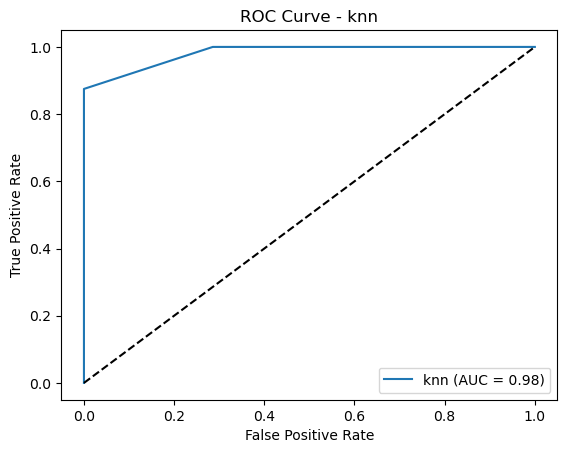

In [84]:

from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba_knn)
plt.figure()
plt.plot(fpr, tpr, label=f'knn (AUC = {roc_auc_knn:.2f})')
plt.plot([0,1], [0,1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - knn')
plt.legend(loc='lower right')
plt.show()


In [82]:
from sklearn.metrics import confusion_matrix

# Logistic Regression
print("Logistic Regression Confusion Matrix:\n", confusion_matrix(y_test, y_pred_logi))

# Naive Bayes
print("Naive Bayes Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))

# Decision Tree
print("Decision Tree Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))

# Random Forest
print("Random Forest Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

# AdaBoost
print("AdaBoost Confusion Matrix:\n", confusion_matrix(y_test, y_pred_ada))

# Gradient Boosting
print("Gradient Boosting Confusion Matrix:\n", confusion_matrix(y_test, y_pred_gb))

# XGBoost
print("XGBoost Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))

# SVM
print("SVM Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))

# KNN
print("KNN Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))


Logistic Regression Confusion Matrix:
 [[ 3  4]
 [ 0 32]]
Naive Bayes Confusion Matrix:
 [[ 4  3]
 [ 8 24]]
Decision Tree Confusion Matrix:
 [[ 5  2]
 [ 2 30]]
Random Forest Confusion Matrix:
 [[ 5  2]
 [ 0 32]]
AdaBoost Confusion Matrix:
 [[ 4  3]
 [ 3 29]]
Gradient Boosting Confusion Matrix:
 [[ 5  2]
 [ 0 32]]
XGBoost Confusion Matrix:
 [[ 5  2]
 [ 0 32]]
SVM Confusion Matrix:
 [[ 3  4]
 [ 0 32]]
KNN Confusion Matrix:
 [[ 5  2]
 [ 0 32]]


In [83]:
import pickle

with open('best_model.pkl', 'wb') as f:
    pickle.dump(knn, f)  
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
with open('columns.pkl', 'wb') as f:
    pickle.dump(list(X.columns), f)
